### Cost Benefit Questions

1. How would you rephrase the business problem if your model was optimizing toward _precision_? i.e., How might the model behave differently, and what effect would it have?
2. How would you rephrase the business problem if your model was optimizing toward _recall_?
3. What would the most ideal model look like in this case?


### Visualizing models over variables

In [1]:
%matplotlib inline

In [9]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../assets/dataset/flight_delays.csv')
df = df.loc[df.DEP_DEL15.notnull()].copy()

In [11]:
df = df.drop(labels='Unnamed: 15', axis=1)

In [12]:
print(df.head())

   DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE UNIQUE_CARRIER  AIRLINE_ID CARRIER  \
0             1            4  2015-01-01             AA       19805      AA   
1             1            4  2015-01-01             AA       19805      AA   
2             1            4  2015-01-01             AA       19805      AA   
3             1            4  2015-01-01             AA       19805      AA   
4             1            4  2015-01-01             AA       19805      AA   

   ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID  \
0              12478                1247802                  31703   
1              12892                1289203                  32575   
2              12478                1247802                  31703   
3              12892                1289203                  32575   
4              11298                1129803                  30194   

   DEST_AIRPORT_ID  DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID  CRS_DEP_TIME  \
0            12892        

In [13]:
df = df[df.DEP_DEL15.notnull()]
df = df.join(pd.get_dummies(df['CARRIER'], prefix='carrier'))
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))
model_dow = lm.LogisticRegression()
features_dow = [i for i in df.columns if 'dow_' in i]
model_carrier = lm.LogisticRegression()
features_carrier = [i for i in df.columns if 'carrier_' in i]

# Using Day of Week Only

In [15]:
features_dow += ['CRS_DEP_TIME']
model_dow.fit(df[features_dow[1:]], df['DEP_DEL15'])

df['probability_dow'] = model_dow.predict_proba(df[features_dow[1:]]).T[1]

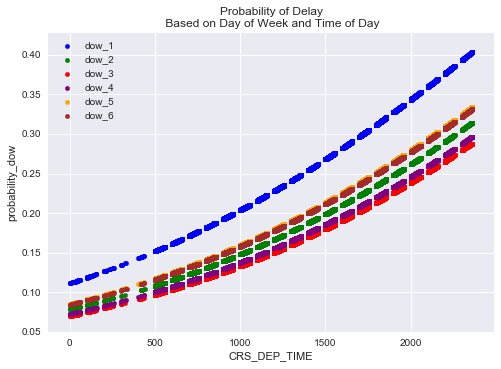

In [18]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for e, c in enumerate(colors):
    df[df[features_dow[e]] == 1].plot(x='CRS_DEP_TIME', y='probability_dow', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')
plt.legend([i for i in df.columns if 'dow_' in i],loc='best')
plt.show()

In [34]:
model_dow = lm.LogisticRegressionCV(cv=10)
features_dow = [i for i in df.columns if 'dow_' in i]
features_dow += ['CRS_DEP_TIME']
model_dow.fit(df[features_dow[1:]], df['DEP_DEL15'])

df['probability_dow'] = model_dow.predict_proba(df[features_dow[1:]]).T[1]

# Using carriers

In [19]:
features_carrier += ['CRS_DEP_TIME']
model_carrier.fit(df[features_carrier[1:]], df['DEP_DEL15'])

df['probability_carrier'] = model_carrier.predict_proba(df[features_carrier[1:]]).T[1]

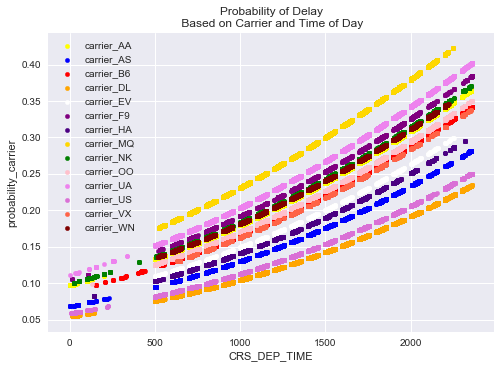

In [20]:
ax = plt.subplot(111)
colors = ['yellow', 'blue', 'red', 'orange', 'white', 'purple', \
          'indigo', 'gold', 'green', 'pink', 'violet', 'orchid', 'tomato', 'maroon']
for e, c in enumerate(colors):
    df[df[features_carrier[e]] == 1].plot(x='CRS_DEP_TIME', y='probability_carrier', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Carrier and Time of Day')
plt.legend([i for i in df.columns if 'carrier_' in i])
plt.show()

In [35]:
model_carrier = lm.LogisticRegressionCV(cv=10)
features_carrier = [i for i in df.columns if 'carrier_' in i]
features_carrier += ['CRS_DEP_TIME']
model_carrier.fit(df[features_carrier[1:]], df['DEP_DEL15'])

df['probability_carrier'] = model_carrier.predict_proba(df[features_carrier[1:]]).T[1]

### Other Answers: visualizing Airline or the inverse

In [8]:
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']
#...

### Visualizing Performance Against Baseline

#### Visualizing AUC and comparing Models

In [22]:
from sklearn import dummy, metrics

In [36]:
model0 = dummy.DummyClassifier()
model0.fit(df[features_dow[1:]], df['DEP_DEL15'])
df['probability_0'] = model0.predict_proba(df[features_dow[1:]]).T[1]

# model1 = lm.LogisticRegressionCV(cv=10)
# model1.fit(df[features_dow[1:]], df['DEP_DEL15'])
# df['probability_1'] = model1.predict_proba(df[features_dow[1:]]).T[1]


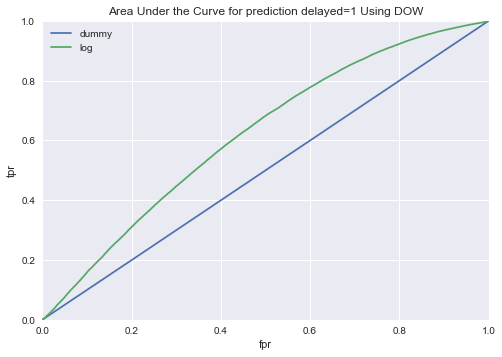

In [53]:
ax = plt.subplot(111)
fpr, tpr, thresholds = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(df.DEP_DEL15, df.probability_dow)
ax.plot(fpr, tpr)
plt.legend(['dummy','log'])

ax.set(title='Area Under the Curve for prediction delayed=1 Using DOW', ylabel='tpr', xlabel='fpr', xlim=(0, 1), ylim=(0, 1))
plt.show()

In [38]:
model0 = dummy.DummyClassifier()
model0.fit(df[features_carrier[1:]], df['DEP_DEL15'])
df['probability_0'] = model0.predict_proba(df[features_carrier[1:]]).T[1]

# model1 = lm.LogisticRegressionCV(cv=10)
# model1.fit(df[features_carrier[1:]], df['DEP_DEL15'])
# df['probability_1'] = model1.predict_proba(df[features_carrier[1:]]).T[1]

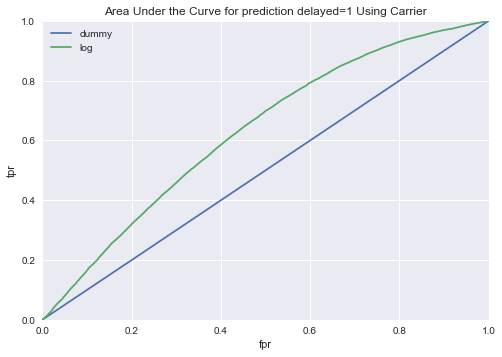

In [52]:
ax = plt.subplot(111)
fpr, tpr, thresholds = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(df.DEP_DEL15, df.probability_carrier)
ax.plot(fpr, tpr)
plt.legend(['dummy','log'])

ax.set(title='Area Under the Curve for prediction delayed=1 Using Carrier', ylabel='tpr', xlabel='fpr', xlim=(0, 1), ylim=(0, 1))
plt.show()

#### Visualizing Precision / Recall

In [ ]:
metrics.precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)

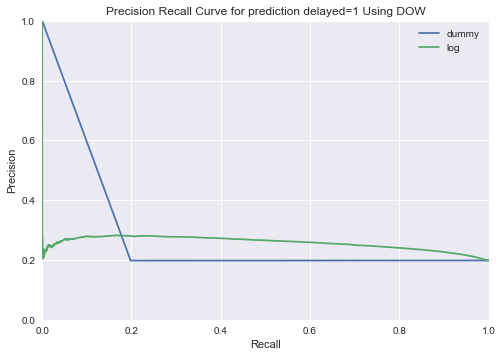

In [48]:
ax = plt.subplot(111)
precision, recall, thresholds = metrics.precision_recall_curve(df.DEP_DEL15, df.probability_0)
ax.plot(recall, precision)
precision, recall, thresholds = metrics.precision_recall_curve(df.DEP_DEL15, df.probability_dow)
ax.plot(recall, precision)
plt.legend(['dummy','log'])
ax.set(title='Precision Recall Curve for prediction delayed=1 Using DOW', ylabel='Precision', xlabel='Recall', xlim=(0, 1), ylim=(0, 1))
plt.show()

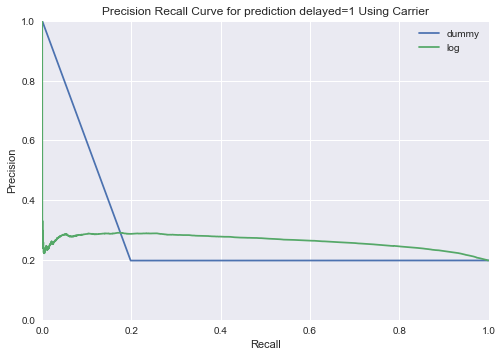

In [50]:
ax = plt.subplot(111)
precision, recall, thresholds = metrics.precision_recall_curve(df.DEP_DEL15, df.probability_0)
ax.plot(recall, precision)
precision, recall, thresholds = metrics.precision_recall_curve(df.DEP_DEL15, df.probability_carrier)
ax.plot(recall, precision)
plt.legend(['dummy','log'])
ax.set(title='Precision Recall Curve for prediction delayed=1 Using Carrier', ylabel='Precision', xlabel='Recall', xlim=(0, 1), ylim=(0, 1))
plt.show()